# Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

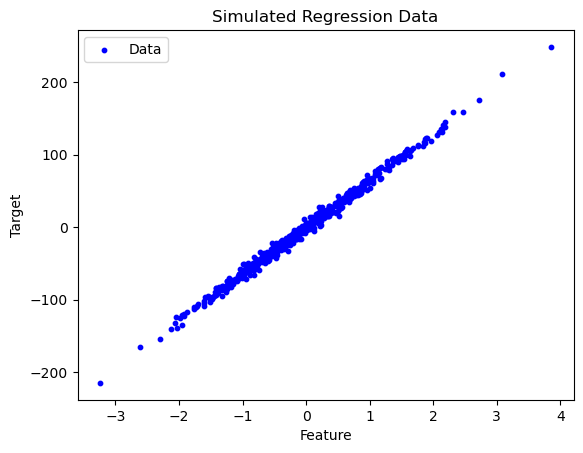

In [3]:
# Generate data
X, y = make_regression(n_samples=500, n_features=1, noise=5, random_state=42)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize
plt.scatter(X, y, color='blue', label="Data", s=10)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Simulated Regression Data")
plt.legend()
plt.show()

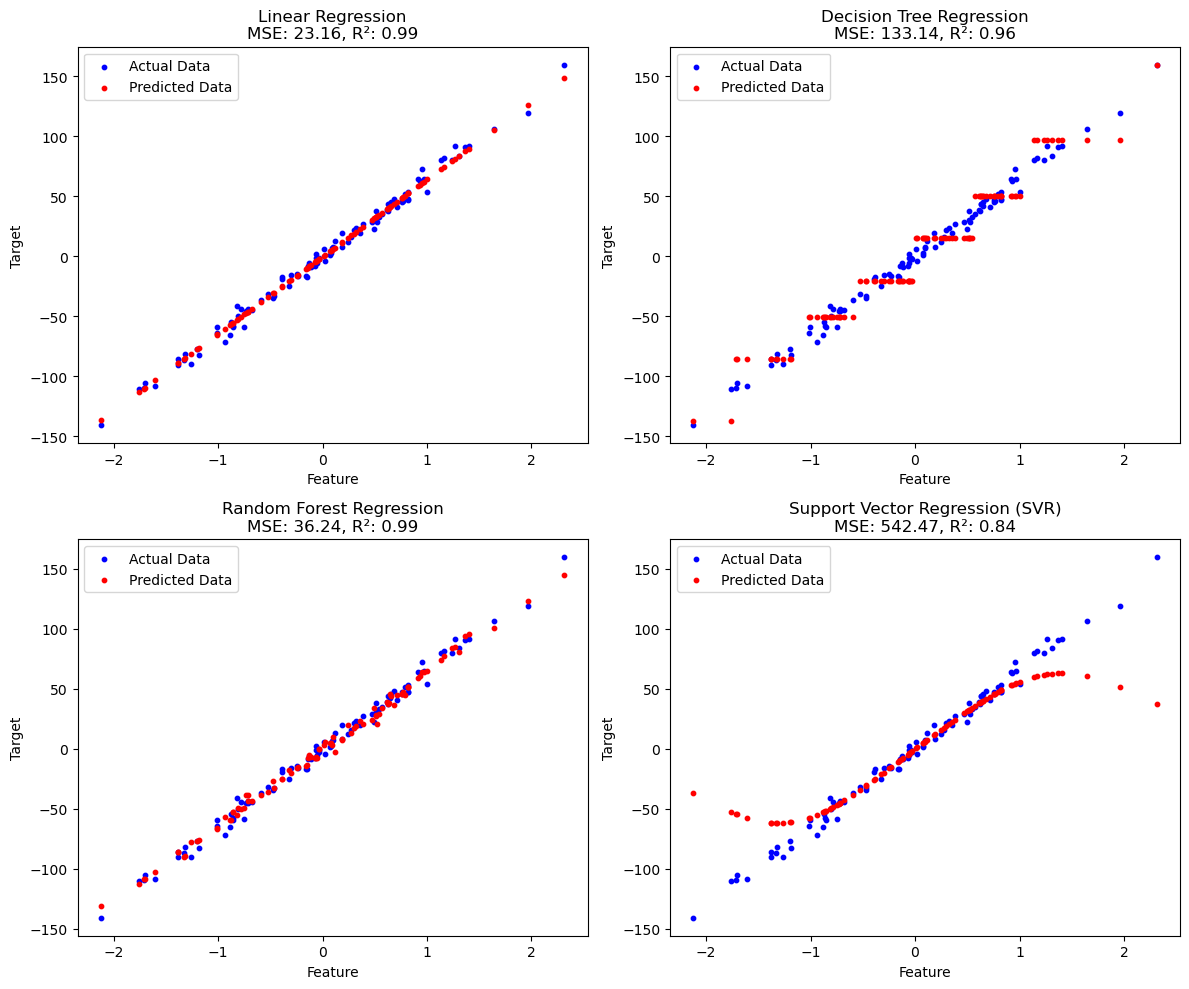

In [5]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=50, random_state=42),
    "Support Vector Regression (SVR)": SVR(kernel='rbf')
}

# Preprocess data for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to access as a list

# Iterate over models
for i, (name, model) in enumerate(models.items()):
    if "SVR" in name:
        model.fit(X_train_scaled, y_train.ravel())  # Fit with scaled data
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train.ravel())  # Fit normally
        y_pred = model.predict(X_test)

    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot in subplot
    axes[i].scatter(X_test, y_test, color="blue", label="Actual Data", s=10)
    axes[i].scatter(X_test, y_pred, color="red", label="Predicted Data", s=10)
    axes[i].set_title(f"{name}\nMSE: {mse:.2f}, R²: {r2:.2f}")
    axes[i].set_xlabel("Feature")
    axes[i].set_ylabel("Target")
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Classification

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

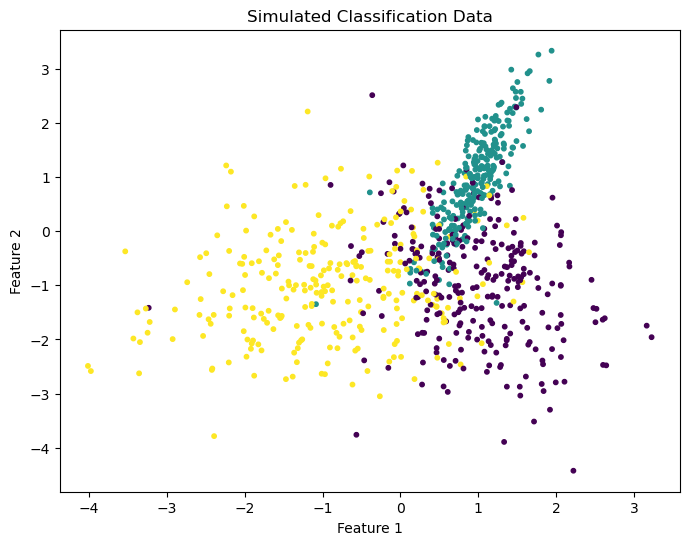

In [10]:
# Generate classification dataset
X, y = make_classification(n_samples=800,  # Number of samples
                           n_features=2,  # Number of features (for 2D visualization)
                           n_classes=3,  # Three classification
                           n_clusters_per_class=1, 
                           n_redundant=0, 
                           random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y,  s=10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Simulated Classification Data")
plt.show()

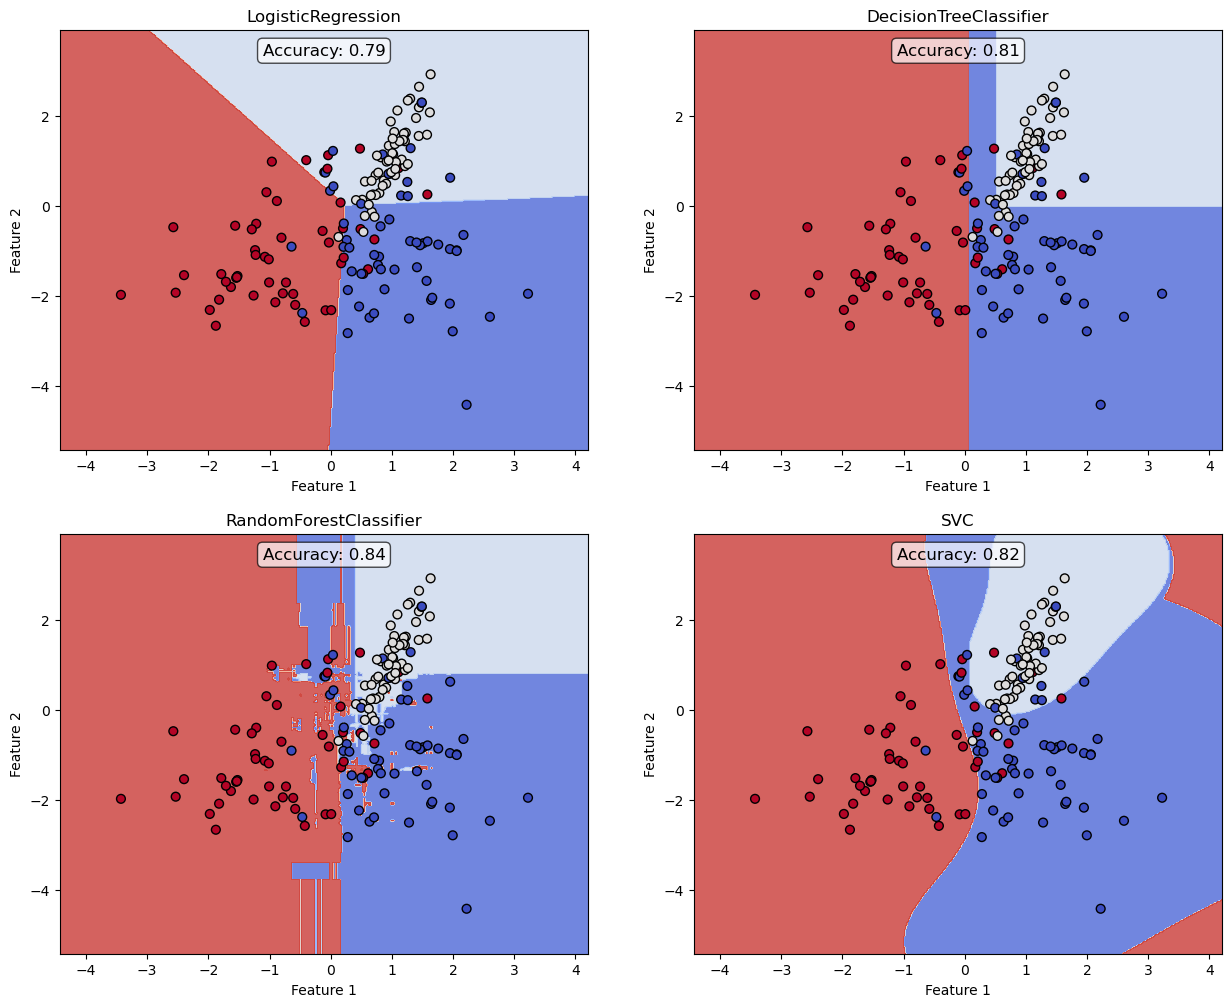

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

# Visualize decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    h = 0.02  # Step size for meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=40)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(f"{model.__class__.__name__}")
    return scatter

# Create a plot grid to compare models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Train and visualize each model
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Plot decision boundaries
    ax = axes[i//2, i%2]
    plot_decision_boundaries(X_test, y_test, model, ax)
    
    # Add accuracy score to the subplot
    ax.text(0.5, 0.95, f"Accuracy: {accuracy:.2f}", fontsize=12, ha='center', va='center', 
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7, boxstyle="round,pad=0.3"))

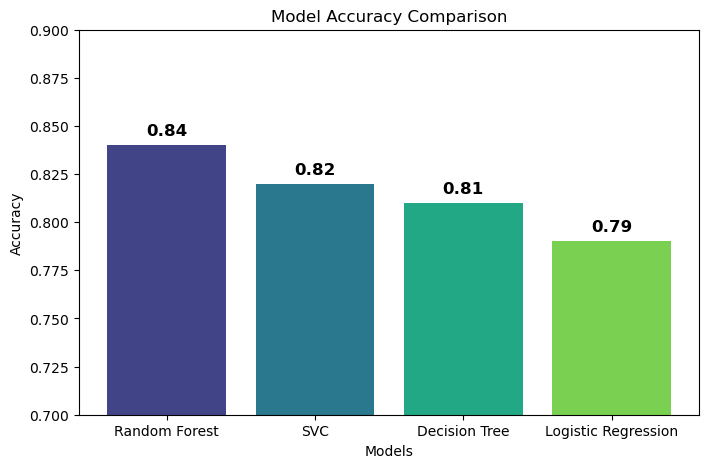

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC']
accuracies = [0.79, 0.81, 0.84, 0.82]

# Sort models by accuracy in descending order
models, accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))

# Use Seaborn color palette for better design
colors = sns.color_palette("viridis", len(models))

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=colors)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 0.9)  # Set y-axis limits for better visualization

# Add accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.2f}', ha='center', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

# Clustering

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

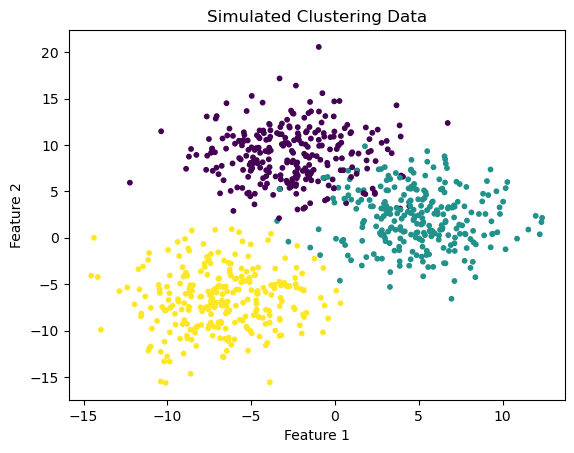

In [30]:
# Generate synthetic clustering data
X, y = make_blobs(n_samples=800, centers=3, cluster_std=3.0, random_state=42)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Simulated Clustering Data")
plt.show()

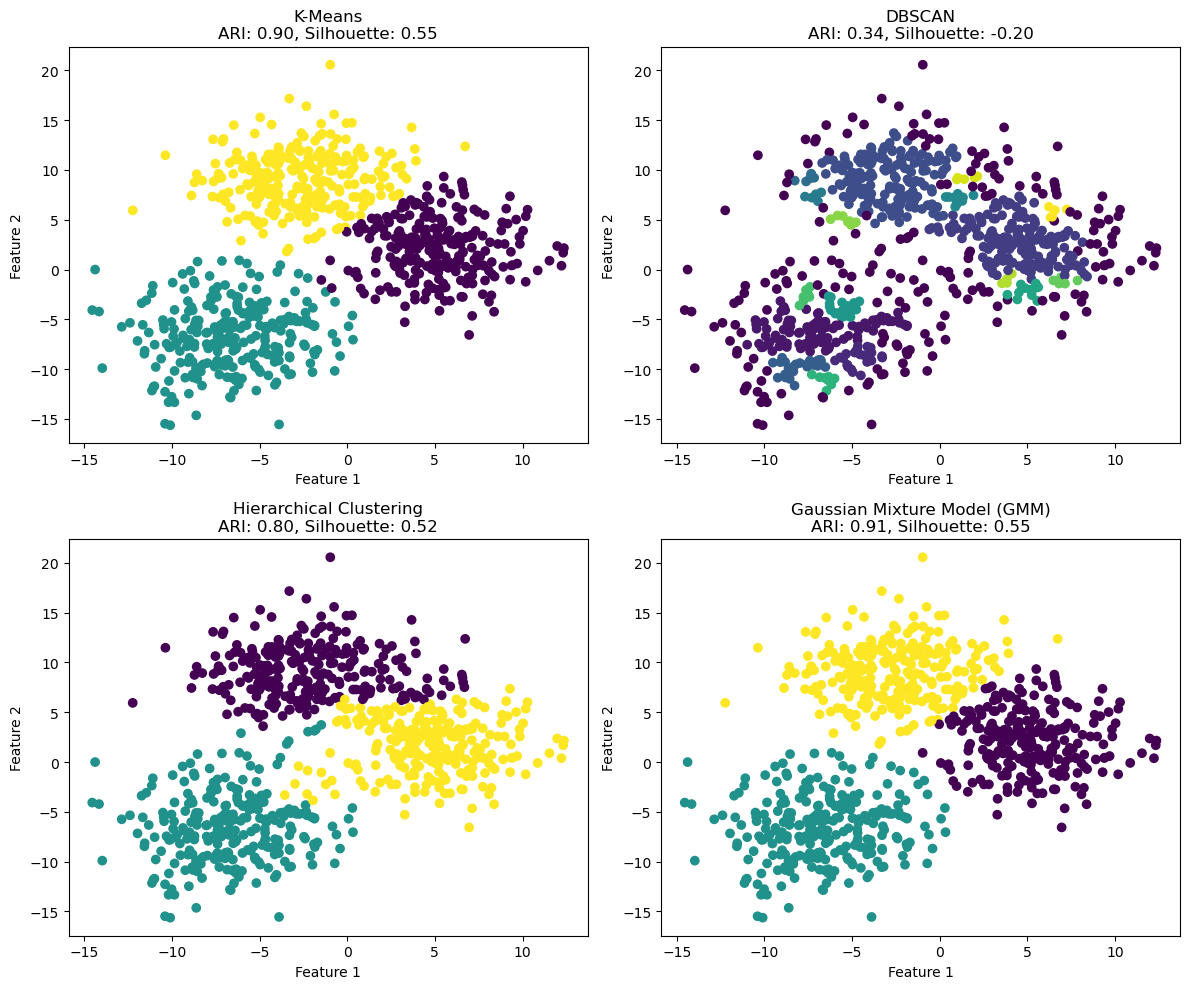

In [32]:
# Define clustering models
models = {
    "K-Means": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=0.8, min_samples=5),
    "Hierarchical Clustering": Birch(n_clusters=3),
    "Gaussian Mixture Model (GMM)": GaussianMixture(n_components=3, random_state=42)
}

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (name, model) in zip(axes, models.items()):
    if isinstance(model, GaussianMixture):
        clusters = model.fit_predict(X)
    else:
        clusters = model.fit_predict(X)
    
    # Compute evaluation metrics
    ari = adjusted_rand_score(y, clusters)
    silhouette = silhouette_score(X, clusters) if len(set(clusters)) > 1 else -1
    
    # Scatter plot
    ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    ax.set_title(f"{name}\nARI: {ari:.2f}, Silhouette: {silhouette:.2f}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Time series

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

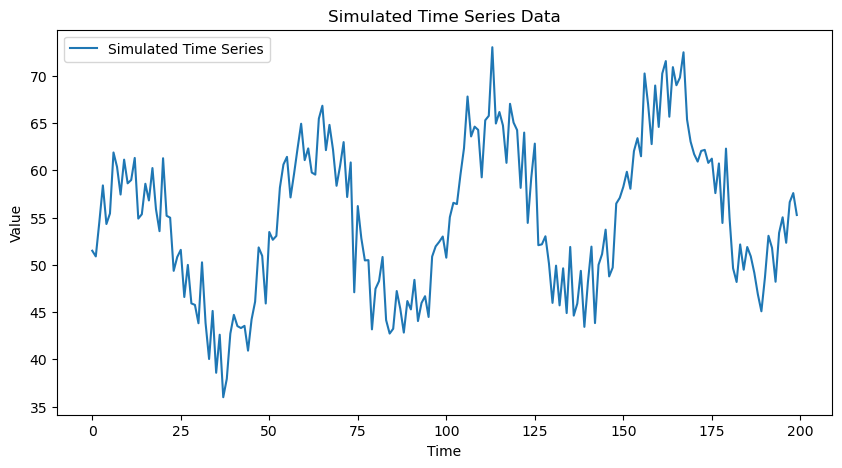

In [37]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate time series data
n_points = 200  # Number of time steps
time = np.arange(n_points)
trend = 0.05 * time + 50 # Linear trend
seasonality = 10 * np.sin(2 * np.pi * time / 50)  # Seasonal pattern
noise = np.random.normal(scale=3, size=n_points)  # Random noise

ts_data = trend + seasonality + noise

# Create DataFrame
df = pd.DataFrame({"Time": time, "Value": ts_data})

# Plot the simulated time series data
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["Value"], label="Simulated Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simulated Time Series Data")
plt.legend()
plt.show()

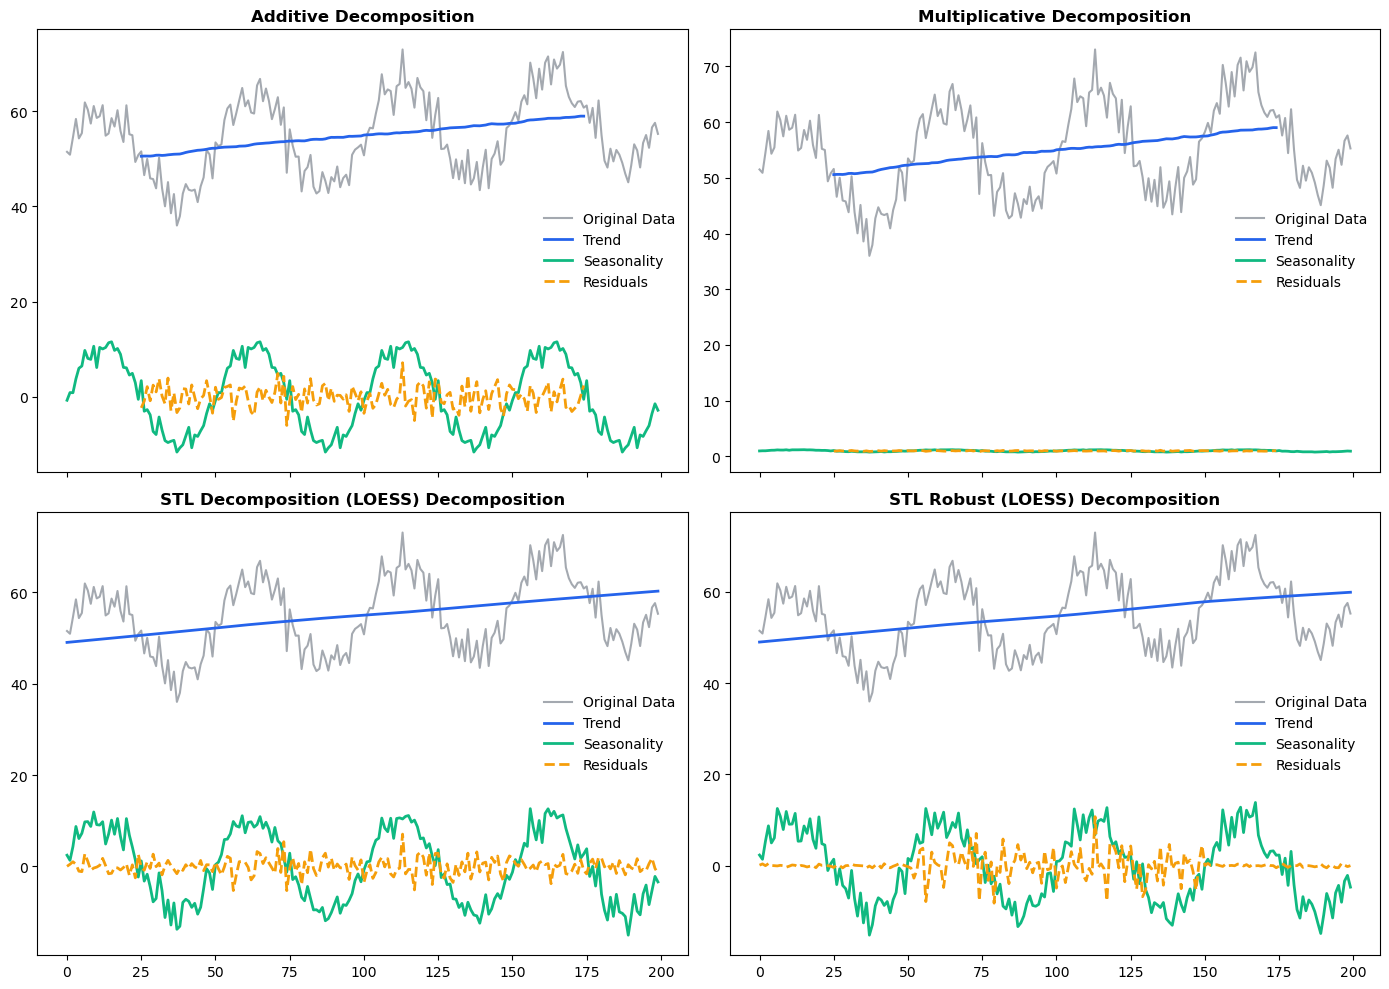

In [39]:
# Perform decomposition using different methods
decompositions = {
    "Additive": seasonal_decompose(df["Value"], model="additive", period=50),
    "Multiplicative": seasonal_decompose(df["Value"], model="multiplicative", period=50),
    "STL Decomposition (LOESS)": STL(df["Value"], period=50).fit(),
    "STL Robust (LOESS)": STL(df["Value"], period=50, robust=True).fit()
}

# Create 4 subplots (one per method)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

for ax, (name, decomposition) in zip(axes.flatten(), decompositions.items()):
    ax.plot(df["Time"], df["Value"], label="Original Data", color="#4B5563", alpha=0.5, linewidth=1.5)

    # Trend Component
    ax.plot(df["Time"], decomposition.trend, label="Trend", color="#2563EB", linewidth=2)

    # Seasonal Component
    ax.plot(df["Time"], decomposition.seasonal, label="Seasonality", color="#10B981", linewidth=2)

    # Residual Component (dashed line for clarity)
    ax.plot(df["Time"], decomposition.resid, label="Residuals", color="#F59E0B", linestyle="dashed", linewidth=2)

    ax.set_title(f"{name} Decomposition", fontsize=12, fontweight="bold")

    # Set legend in middle-right
    ax.legend(frameon=False, fontsize=10, loc="center right")

# Improve layout
plt.tight_layout()
plt.show()

In Multiplicative decomposition, the seasonality component cannot be negative because it represents a scaling factor rather than an additive shift. The values should ideally be greater than 0, reflecting how the original time series is scaled over time.

In [42]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error

# Dictionary to store computed metrics
evaluation_results = {
    "Shapiro-Wilk p-value": {},
    "Trend Correlation": {},
    "Variance Explained by Trend": {},
    "Variance Explained by Seasonality": {},
    "RMSE of Trend Component": {}
}

# Compute evaluation metrics
for name, decomposition in decompositions.items():
    # Drop NaN values for proper alignment
    residuals = decomposition.resid.dropna()
    trend_component = decomposition.trend.dropna()
    seasonal_component = decomposition.seasonal.dropna()

    # Align original time series with trend data
    valid_idx = trend_component.index.intersection(df.index)
    aligned_original = df.loc[valid_idx, "Value"]

    # Shapiro-Wilk Test (only if enough residuals exist)
    if len(residuals) > 2:
        _, p_value = shapiro(residuals)
        evaluation_results["Shapiro-Wilk p-value"][name] = p_value
    else:
        evaluation_results["Shapiro-Wilk p-value"][name] = np.nan

    # Compute correlation between original and trend
    common_idx = aligned_original.index.intersection(trend_component.index)
    evaluation_results["Trend Correlation"][name] = aligned_original.loc[common_idx].corr(trend_component.loc[common_idx])

    # Compute variance explained by trend and seasonality
    var_original = df["Value"].var()
    evaluation_results["Variance Explained by Trend"][name] = trend_component.var() / var_original
    evaluation_results["Variance Explained by Seasonality"][name] = seasonal_component.var() / var_original

    # Compute RMSE for trend component
    evaluation_results["RMSE of Trend Component"][name] = mean_squared_error(
        aligned_original.loc[common_idx], trend_component.loc[common_idx], squared=False
    )

# Convert results to DataFrame and handle NaN values
df_metrics = pd.DataFrame(evaluation_results).fillna("N/A")
# Reset index to move row names (index) into the first column
df_eval = df_metrics.reset_index().rename(columns={"index": "Method"})
df_eval

,Method,Shapiro-Wilk p-value,Trend Correlation,Variance Explained by Trend,Variance Explained by Seasonality,RMSE of Trend Component
0,Additive,6.517582e-01,0.496424,0.093305,0.902147,7.906495
1,Multiplicative,6.702073e-01,0.496424,0.093305,0.000301,7.906495
2,STL Decomposition (LOESS),3.896491e-02,0.212685,0.164770,0.930690,7.917069
3,STL Robust (LOESS),5.869348e-14,0.220537,0.166128,0.916620,7.894483


| **Metric**                     | **Description** | **Ideal Value** |
|---------------------------------|---------------|---------------|
| **Shapiro-Wilk p-value**        | Tests if residuals are normally distributed. | **> 0.05** (higher is better) |
| **Trend Correlation**           | Measures how well the trend follows the original data. | **Closer to 1** (higher is better) |
| **Variance Explained by Trend** | Percentage of variance captured by the trend. | **Higher is better** |
| **Variance Explained by Seasonality** | Percentage of variance captured by seasonality. | **Higher if seasonality is strong** |
| **RMSE of Trend Component**     | Measures trend accuracy (lower means better fit). | **Lower is better** |

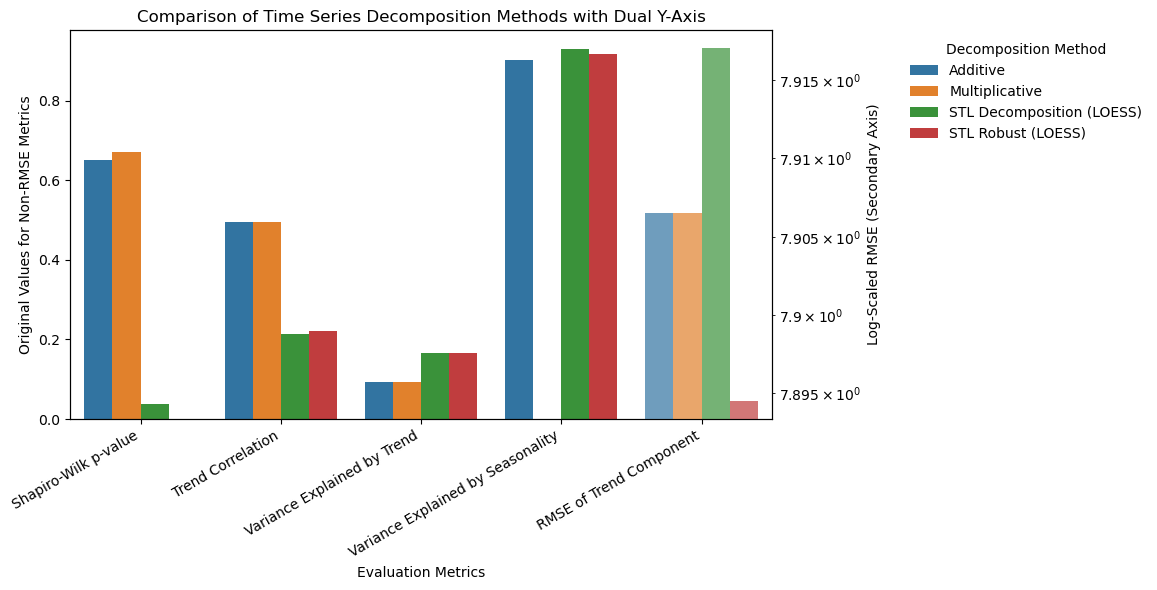

In [45]:
# Define improved color palette
custom_palette = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728"]  # Blue, Orange, Green, Red

# Create a figure and axis with a secondary y-axis for RMSE
fig, ax1 = plt.subplots(figsize=(12, 6))

# Separate RMSE from other metrics
df_melted = df_eval.melt(id_vars=["Method"], var_name="Metric", value_name="Value")
rmse_data = df_melted[df_melted["Metric"] == "RMSE of Trend Component"]
non_rmse_data = df_melted[df_melted["Metric"] != "RMSE of Trend Component"]

# Primary y-axis for non-RMSE metrics
sns.barplot(data=non_rmse_data, x="Metric", y="Value", hue="Method", palette=custom_palette, ax=ax1)

# Create secondary y-axis for RMSE (log scale)
ax2 = ax1.twinx()
sns.barplot(data=rmse_data, x="Metric", y="Value", hue="Method", palette=custom_palette, ax=ax2, alpha=0.7)
ax2.set_yscale("log")  # Apply log scale to RMSE

# Rotate x-axis labels for readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right")

# Set labels and title
ax1.set_xlabel("Evaluation Metrics")
ax1.set_ylabel("Original Values for Non-RMSE Metrics")
ax2.set_ylabel("Log-Scaled RMSE (Secondary Axis)")
ax1.set_title("Comparison of Time Series Decomposition Methods with Dual Y-Axis")

# Show legend outside the plot for clarity
ax1.legend(title="Decomposition Method", bbox_to_anchor=(1.18, 1), loc="upper left", frameon=False)
ax2.legend_.remove()  # Remove duplicate legend from secondary axis

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

# Add noise

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [50]:
# Function to generate classification data and test different models with noise
def evaluate_models_with_noise(n_samples=1000, n_features=10, noise_levels=[0, 0.1, 0.3, 0.5, 0.7, 1.0], random_state=42):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=5,
                               n_redundant=2, n_clusters_per_class=1, random_state=random_state)
    
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVC": SVC()
    }
    
    results = {name: [] for name in models.keys()}
    
    for noise in noise_levels:
        X_noisy = X + np.random.normal(scale=noise, size=X.shape)  # Add Gaussian noise
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=random_state)
        
        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results[name].append((noise, acc))
    
    return results

# Generate data and evaluate models
results = evaluate_models_with_noise()

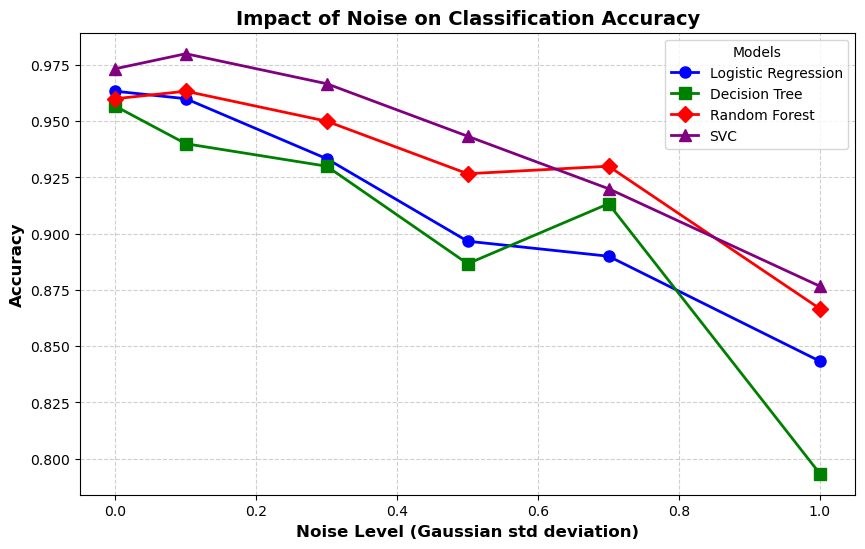

In [51]:
# Plot the results with distinct colors and design
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']  # Distinct colors for clarity
markers = ['o', 's', 'D', '^']  # Unique markers for each model

for (model, data), color, marker in zip(results.items(), colors, markers):
    noise_levels, accuracies = zip(*data)
    plt.plot(noise_levels, accuracies, marker=marker, linestyle='-', color=color, label=model, linewidth=2, markersize=8)

plt.xlabel("Noise Level (Gaussian std deviation)", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12, fontweight='bold')
plt.title("Impact of Noise on Classification Accuracy", fontsize=14, fontweight='bold')
plt.legend(title="Models", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()